                                            Generating Word Cloud                                                                 

# Generating Word Clouds with Python

A Word Cloud is a picture made up of words where the size of each word shows how frequently it appears in the dataset i.e the bigger the word appears in the cloud the more often that word is used. They help us to identify the most common and important words in a text. In this article, we will understand about word cloud and how to generate it using Python.

# Implementing Word Cloud in Python 


Let's load the dataset using pandas. 

In [13]:
Dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/IMDB-Dataset.csv"

import pandas as pd

df = pd.read_csv(Dataset)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Step 2: Understanding the Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [16]:
df.duplicated().sum()

418

In [17]:
df.columns
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Step 3: Cleaning the Text Data    

Before generating the word cloud, we need to clean the text data which involves:

1. Removing punctuation

2. Converting text to lowercase

3. Removing stopwords i.e common words like "the", "is", "and"

* re.sub(): This removes punctuation and numbers
* STOPWORDS: These are list of common stopwords

In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
df.shape

(50000, 2)

In [20]:
import re
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['review'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join([word for word in text.split() if word not in stopwords])

* import re - Imports the regular expression module for pattern matching and text manipulation
* from wordcloud import WordCloud, STOPWORDS - Imports the WordCloud class for creating word clouds and a predefined set of common stopwords

# Step 4: Generating the Word Cloud

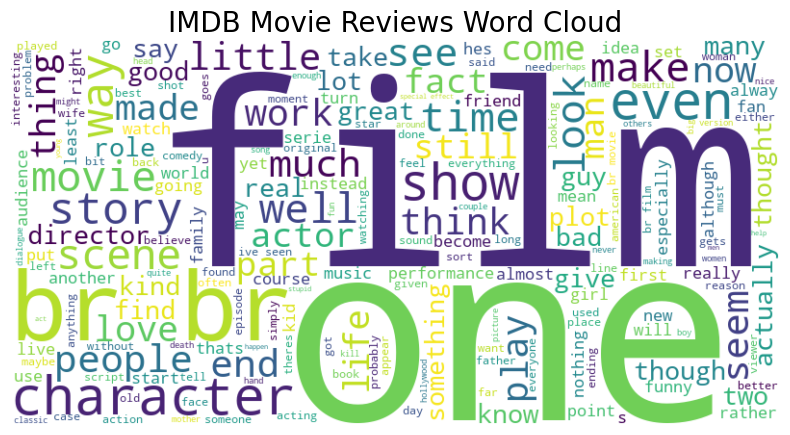

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.title('IMDB Movie Reviews Word Cloud', fontsize=20)
plt.show()

# Step 5: Customizing the Word Cloud

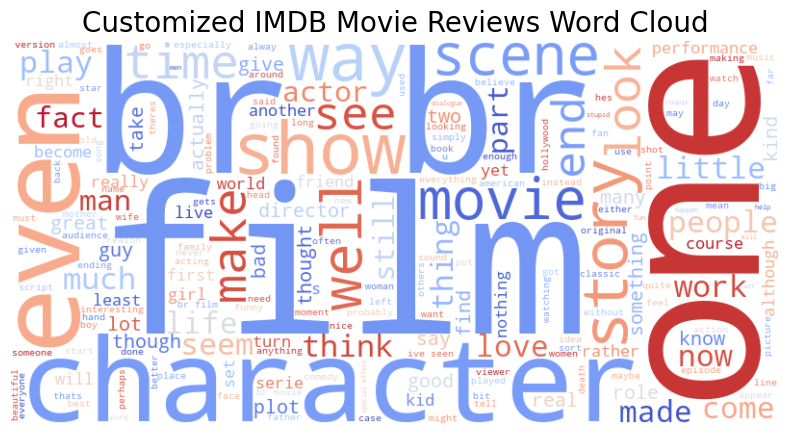

In [26]:
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white',
                      colormap='coolwarm',
                      max_words=200,
                      contour_width=3,
                      contour_color='steelblue').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.title('Customized IMDB Movie Reviews Word Cloud', fontsize=20)
plt.show()